# Лабораторная работа №4
# Задача класссификации

Пусть имеется множество объектов, характеризующихся признаками и разделённых некоторым образом на классы.

Задача классификации — это задача построения алгоритма (функции), способного 
классифицировать произвольный объект из исходного пространства признаков, т.е. определять метку класса для этого объекта.


## Загрузка наборов данных

Некоторые наиболее часто используемые в учебных и исследовательских целях наборы данных можно загрузить напрямую из бибиотеки scikit-learn. Это относится к таким наборам, как

* boston house-prices dataset (regression)
* iris dataset (classification)  
* diabetes dataset (regression)  
* digits dataset (classification)  
* physical excercise linnerud dataset  
* wine dataset (classification)  
* breast cancer wisconsin dataset (classification)  


Например, для загрузки набора "Ирисы" можно использовать код:

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

Набор данных загружается в словарь специального вида со следующими ключами: 

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Названия признаков и меток классов находятся в элементах `feature_names` и `target_names`:

In [4]:
print( "Признаки: ", iris['feature_names'] )
print( "Метки: ", iris.target_names )

Признаки:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Метки:  ['setosa' 'versicolor' 'virginica']


Значения признаков и меток хранятся в элементах `data` и `target` как массивы `ndarray`:

In [5]:
print(iris.data[0:5])
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Если вызвать метод `load_iris()` с ключом `as_frame=True`, то набор данных будет доступен как объект `DataFrame`: 

In [6]:
iris2 = datasets.load_iris(as_frame=True)
type(iris2.frame)

pandas.core.frame.DataFrame

In [7]:
iris2.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Препроцессинг наборов данных

Во многих алгоритмах классификации содержатся допущения относительно классифицируемых данных, поэтому в ряде случаев может потребоваться предварительная подготовка (препроцессинг) данных. 

### Масштабирование данных

Если данные содержат признаки разного масштаба, то многие алгоритмы классификации работают лучше, когда признаки имеют одинаковый масштаб. В частности, это полезно для алгоритмов, использующих меры расстояния, такие как метод k-ближайших соседей. 

Создадим случайный набор точек, преобразуем целочисленный массив `X` к типу `float`, масштабируем его на интервал `[0, 1]` и визуализируем на плоскости:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randint(0, 100, (50, 2))

In [9]:
X = np.array(X, dtype=float)

In [10]:
# масштабирование на [0,1]
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

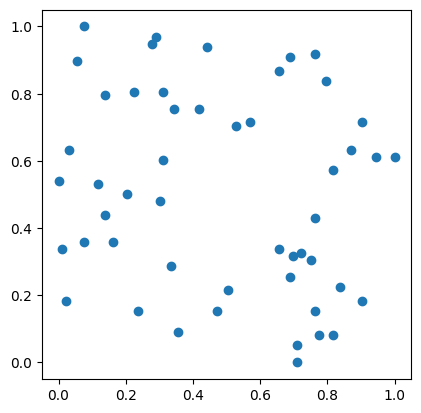

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.axis('square')
plt.show()

Можно масштабировать данные, используя класс `MinMaxScaler` из scikit-learn:

In [12]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=3)

X = iris.data
scaler = MinMaxScaler(feature_range=(1, 5)) # значения признаков от 1 до 5
rescaledX = scaler.fit_transform(X)

print(rescaledX[0:5,:])

[[1.889 3.5   1.271 1.167]
 [1.667 2.667 1.271 1.167]
 [1.444 3.    1.203 1.167]
 [1.333 2.833 1.339 1.167]
 [1.778 3.667 1.271 1.167]]


### Стандартизация данных

Стандартизация - это метод преобразования признаков к виду, когда они имеют среднее значение 0 и стандартное отклонение 1. Этот способ подходит, в частности, для методов машинного обучения, предполагающих нормальное распределение входных данных. 

Создадим случайный набор точек, преобразуем целочисленный массив `X` к типу `float`, стандартизуем его и визуализируем на плоскости:

In [13]:
X = np.random.randint(0, 100, (50, 2))

In [14]:
X = np.array(X, dtype=float)

In [15]:
# стандартизация
X[:,0] = (X[:,0] - np.mean(X[:,0])) / np.std(X[:,0])
X[:,1] = (X[:,1] - np.mean(X[:,1])) / np.std(X[:,1])

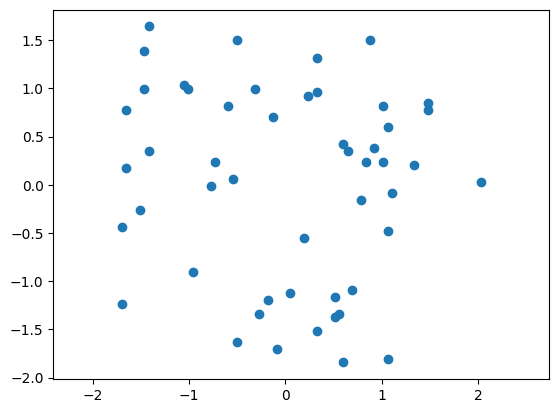

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.axis('Equal')
plt.show()

In [17]:
np.mean(X[:,0]), np.std(X[:,0]), np.mean(X[:,1]), np.std(X[:,1])

(np.float64(5.329070518200751e-17),
 np.float64(0.9999999999999999),
 np.float64(3.885780586188048e-18),
 np.float64(1.0))

Набор данных можно стандартизовать при помощи класса `StandardScaler` из scikit-learn:

In [18]:
from sklearn.preprocessing import StandardScaler

X = iris.data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

print(rescaledX[0:5,:])

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]


### Нормировка данных

Нормировка - это изменение масштаба каждой строки (записи) до единичной длины. Метод полезен для разреженных наборов данных (со многими нулями) при использовании
алгоритмов, использующих расстояние (например, метод k-ближайших соседей). В качестве нормы можно использовать ‘l1’, ‘l2’ или ‘max’ (по умолчанию ‘l2’). 
Можно нормализовать данные с помощью класса `Normalizer` из scikit-learn: 

In [19]:
from sklearn.preprocessing import Normalizer

X = iris.data
scaler = Normalizer(norm='max').fit(X)
normalizedX = scaler.transform(X)

print(normalizedX[140:,:])

[[1.    0.463 0.836 0.358]
 [1.    0.449 0.739 0.333]
 [1.    0.466 0.879 0.328]
 [1.    0.471 0.868 0.338]
 [1.    0.493 0.851 0.373]
 [1.    0.448 0.776 0.343]
 [1.    0.397 0.794 0.302]
 [1.    0.462 0.8   0.308]
 [1.    0.548 0.871 0.371]
 [1.    0.508 0.864 0.305]]


## Обучающая и контрольная (тестовая) выборки

Для оценки качества обученной модели классификации используют разбиение на обучающую (training) и тестовую (test) выборки. 

In [20]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
shuffled_indexes = np.random.permutation(len(X))
shuffled_indexes

array([ 95, 147, 141,  71,  85, 108,  38, 109, 144, 126,  36,  50, 111,
         2,  76,  41,  40,  33,  98,  66, 143,  60, 131, 113, 112,  88,
        90,  28,  37,  65, 137,  45, 106, 129, 135, 110,  39,   4,  17,
        84,  22, 105, 102,  29,  47, 121,  56,   6, 142, 134, 136,  97,
       133,  11,  61, 107, 148, 117, 149,  42,  20,  87,  15, 130,  23,
         8, 145,  75,  96,  27,  46, 123,  24, 138,  51, 116,  73, 127,
         9,  69,  31, 103,   5, 125, 139,  92, 146,  26,  93,  16,  32,
        44,  78,  21,  18, 140,  63,  81,   7,  74,  64,  94,  53,  62,
        12,  43,  34,  79,   0,  80,  59,  77,  30,  89, 115,  54, 104,
       122, 101, 128, 114,  83,  52,  49,  13, 119, 100,  25,  10,  19,
        86,  14,  55,  58, 118,  48,  70,  99, 124, 132,  57,  67,  91,
         3,  82,  68,   1,  72, 120,  35])

In [23]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_size

30

In [24]:
test_indexes = shuffled_indexes[:test_size]
train_indexes = shuffled_indexes[test_size:]

In [25]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

Объединим использованный выше код в одну функцию:

In [27]:
def my_train_test_split(X, y, test_ratio=0.2, seed=None):
    """returns X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

Разбиение на обучающую и тестовую выборки с аналогичным интерфейсом реализовано в `scikit-learn`:

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

## Классификация методом K ближайших соседей

В методе ближайших соседей точка классифицируется согласно классам ее ближайших соседей.

Для иллюстрации метода рассмотрим следующий набор из 10 точек на плоскости:

In [31]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [2.280362439, 2.866990263],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2]

In [32]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

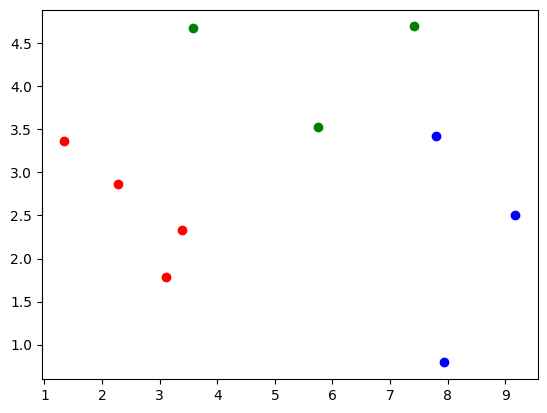

In [33]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='r')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='g')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], color='b')
plt.show()

Попробуем классифицировать по ближайщим соседям следующую точку `x`.

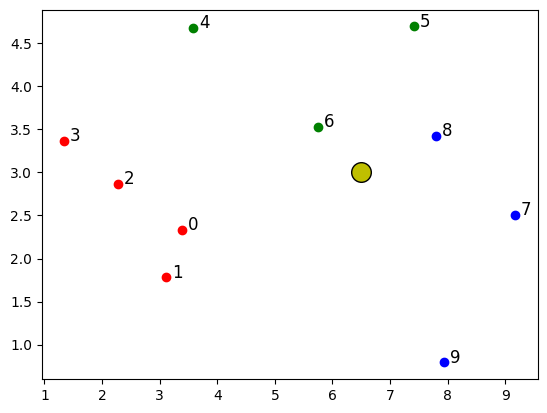

In [34]:
x = np.array([6.5, 3.])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='r')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='g')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], color='b')
plt.scatter(x[0], x[1], color='y', edgecolor='k', s=200)
for idx in range(len(y_train)):
    plt.text(X_train[idx,0]+0.1, X_train[idx,1], idx, fontsize=12, color='k')
plt.show()

В качестве расстояния будем использовать евклидово расстояние на плоскости:

In [35]:
distances = []

for x_train in X_train:
    d = np.sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [36]:
distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in X_train] # list comprehension

In [37]:
distances

[np.float64(3.1776298088542574),
 np.float64(3.6022558826969697),
 np.float64(4.221733380536819),
 np.float64(5.1693323711776715),
 np.float64(3.3664002347922164),
 np.float64(1.9315604187414326),
 np.float64(0.9247116290723647),
 np.float64(2.716524863240067),
 np.float64(1.360566263959598),
 np.float64(2.6362758020684964)]

In [38]:
np.argsort(distances) # индексы отсортированного списка (по возрастанию)

array([6, 8, 5, 9, 7, 0, 4, 1, 2, 3])

Будем выбирать класс точки `x` по `k` ближайщим соседям:

In [39]:
nearest = np.argsort(distances)
k = 5

In [40]:
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]
topK_y

[np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2)]

In [41]:
from collections import Counter

votes = Counter(topK_y)
votes

Counter({np.int64(2): 3, np.int64(1): 2})

In [42]:
votes.most_common(1)

[(np.int64(2), 3)]

In [43]:
predict_y = votes.most_common(1)[0][0]
predict_y

np.int64(2)

Объединим программный код, использованный выше в одну функцию:

In [44]:
#import numpy as np
#from collections import Counter


def kNN_classify(k, X_train, y_train, x):

    assert 1 <= k <= X_train.shape[0], "k must be valid"
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0], \
        "the feature number of x must be equal to X_train"

    distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
    nearest = np.argsort(distances)

    topK_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(topK_y)

    return votes.most_common(1)[0][0]

In [45]:
kNN_classify(k, X_train, y_train, x)

np.int64(2)

Аналогичные результаты дает классификатор метода ближайших соседей из библиотеки scikit-learn:

In [46]:
from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier(n_neighbors=5) # создаем классификатор
kNN_clf.fit(X_train, y_train)                 # обучаем классификатор

KNeighborsClassifier()

Для классификации точки `x` необходимо преобразование размеров (из вектора в матрицу):

In [47]:
x

array([6.5, 3. ])

In [48]:
x.reshape(1,-1)

array([[6.5, 3. ]])

In [49]:
x.reshape(-1,1)

array([[6.5],
       [3. ]])

Одна из размерностей `reshape` может быть указана как -1, тогда значение этой размерности выводится из длины массива и других размерностей.

Прогнозируем класс точки `x` при помощи 

In [50]:
kNN_clf.predict(x.reshape(1,-1))

array([2])

In [51]:
y_predict = kNN_clf.predict(x.reshape(1,-1))[0]
y_predict

np.int64(2)

Получаем для точки `x` ту же метку класса `2`.

## Классификация набора данных digits

Набор данных `digits` представляет собой изображения цифр от 0 до 9.

In [52]:
digits = datasets.load_digits()

X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

Метки классов представляют собой цифры от 0 до 9:

In [53]:
y[:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

А данные представляют собой изображения цифр:

In [54]:
a_digit = X[666]
a_digit_image = a_digit.reshape(8, 8)

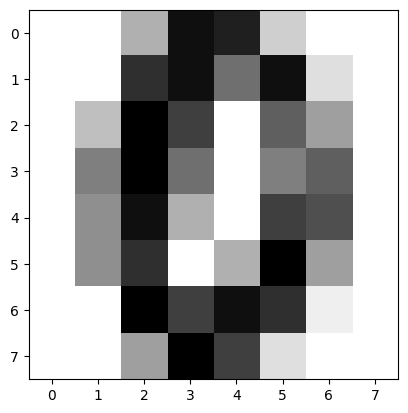

In [55]:
plt.imshow(a_digit_image, cmap = plt.cm.binary)
plt.show()

Создадим и обучим классификатор метода ближайших соседей на обучающей выборке из набора `digits`: 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3) # по трем ближайшим соседям
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Выполним прогнозирование меток классов (цифр):

In [57]:
y_pred = knn.predict(X_test)

Оценим качество прогноза при помощи показателя "доля верных ответов" (accuracy) :

In [58]:
sum(y_pred == y_test)

np.int64(356)

In [59]:
sum(y_pred == y_test) / len(y_test)

np.float64(0.9888888888888889)

In [60]:
def accuracy_score(y_true, y_predict):
    '''input: y_true, y_predict
       returns accuracy'''
    assert y_true.shape[0] == y_predict.shape[0], \
        "the size of y_true must be equal to the size of y_predict"

    return sum(y_true == y_predict) / len(y_true)

In [61]:
accuracy_score(y_test, y_pred)

np.float64(0.9888888888888889)

Также качество классификации можно оценить при помощи матрицы ошибок (по строкам истинные классы, по столбцам предсказанные классы), отчета о классификации, показателя доли ошибок:

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0 43  1  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 32]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        31
           5       1.00      0.96      0.98        45
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        35
           8       1.00      0.97      0.99        34
           9       0.97      0.97      0.97        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [64]:
print("Доля ошибок неправильной классификации:",round(np.mean(y_pred!=y_test),3))

Доля ошибок неправильной классификации: 0.011


## Выбор оптимальных параметров классификатора

При использовании классификаторов с параметрами возникает вопрос выбора оптимальных параметров классификатора.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)

Лучшее k = 1
Лучшая оценка = 0.9907407407407407


Классификатор `KNeighborsClassifier` имеет параметр `weights`, который может принимать значения:

* `uniform`: единый вес, когда все точки в каждой окрестности имеют одинаковый вес
* `distance`: точки взвешиваются, обратно пропорционально расстоянию до них, в этом случае более близкие соседи точки будут иметь большее влияние, чем соседи, находящиеся дальше

Выберем лучший классификатор в зависимости от числа соседей `k` и параметра `weights`:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

best_score = 0.0
best_k = -1
best_method = ""
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
        
print("Лучший метод =", best_method)
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)

Лучший метод = distance
Лучшее k = 7
Лучшая оценка = 0.9888888888888889


Также у классификатора `KNeighborsClassifier` есть параметр `p`, который представляет собой степень в метрике Минковского:

$\rho\left(\mathbf{x},\mathbf{y}\right) = \left(\sum_{i}\left|x_{i}-y_{i}\right|^{p}\right)^{\frac{1}{p}}$

Можно выбрать лучший классификатор в зависимости от числа соседей `k` и параметра `p`:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

best_score = 0.0
best_k = -1
best_p = -1

for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_p = p
            best_score = score
        
print("Лучшее k =", best_k)
print("Лучшее p =", best_p)
print("Лучшая оценка =", best_score)

Лучшее k = 5
Лучшее p = 5
Лучшая оценка = 0.9899888765294772


В scikit-learn имеется мощный инструмент для автоматического подбора параметров для моделей машинного обучения `GridSearchCV`. `GridSearchCV` находит наилучшие параметры путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма затратным по ресурсам.

In [68]:
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

In [69]:
knn_clf = KNeighborsClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [71]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 21.1 s, sys: 105 ms, total: 21.2 s
Wall time: 7.91 s


/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

Параметры лучшего классификатора и значение оценки классификатора находится в следующих свойствах:

In [72]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=4, weights='distance')

In [73]:
grid_search.best_score_

np.float64(0.9833022967101179)

Для ускорения нахождения параметров лучшего классификатора можно использовать параллельные вычисления (`n_jobs=-1`):

In [74]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 241 ms, sys: 176 ms, total: 417 ms
Wall time: 4.39 s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

Важнейший параметр классификатора – количество соседей – можно оценить также методом "локтя":

In [75]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

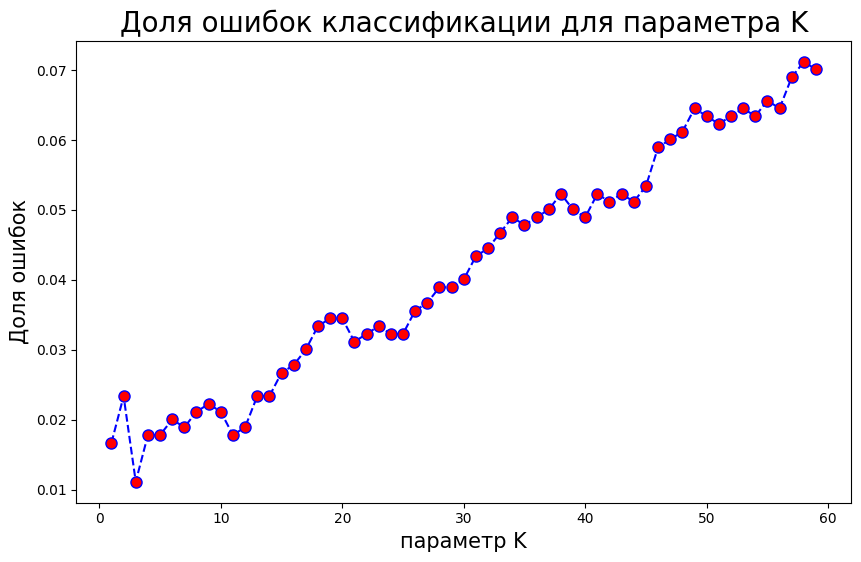

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15);

## Наивная байесовская классификация

Техника наивной байесовской классификации основывается на так называемой теореме Байеса и подходит, в частности, когда размерность входных данных высока. Несмотря на свою простоту наивная байесовская классификация часто превосходит по эффективности более сложные методы классификации. 

### Теорема Байеса

Алгоритм базируется на знаменитой теореме Байеса, в которой фигурируют условные вероятности. 

Условная вероятность - это вероятность наступления некоторого события при условии, что некоторое другое событие уже произошло. Зная условные вероятности, можно посчитать вероятность события, используя априорную информацию.  

Математически теорема Байеса состоит в следующем:

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$

где $A$ и $B$ – события и $P(B)\neq{0}$.

$P(A\mid B)$ – это условная вероятность: правдоподобие наступления события $A$ при условии, что произошло событие $B$.

$P(B\mid A)$ – это также условная вероятность: правдоподобие наступления события $B$ при условии, что произошло событие $A$.

$P(A)$ и $P(B)$ – это вероятности наступления $A$ и $B$ независимо друг от друга.

### Почему наивный байесовский и почему алгоритм быстр

Метод называют наивным байесовским, потому что расчет вероятностей для каждого события упрощен, чтобы сделать расчет легко выполнимым. Вместо того, чтобы пытаться вычислить значения каждого значения атрибута, они считаются условно независимыми при заданном целевом значении.

Это очень сильное предположение, которое маловероятно в реальных условиях (что признаки не связаны). Тем не менее, этот подход на удивление хорошо работает на различных наборах данных, в т.ч. в тех, в которых это предположение не выполняется.

Обучение происходит быстро, потому что необходимо рассчитать только вероятность каждого класса и вероятность каждого класса при различных входных значениях.

Вероятности классов - это просто количество записей каждого класса, деленное на общее количество записей. Условные вероятности - это количество появлений каждого значения признака для данного значения класса, деленное на количество записей с этим значением класса.

В качестве примера будем рассматривать набор данных о качестве вина 
(http://archive.ics.uci.edu/ml/datasets/Wine).

Считаем данные из набора и проведем их анализ:

In [77]:
df = datasets.load_wine(as_frame=True).frame
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [79]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Визуализируем диаграммы размаха в разбивке по классам:

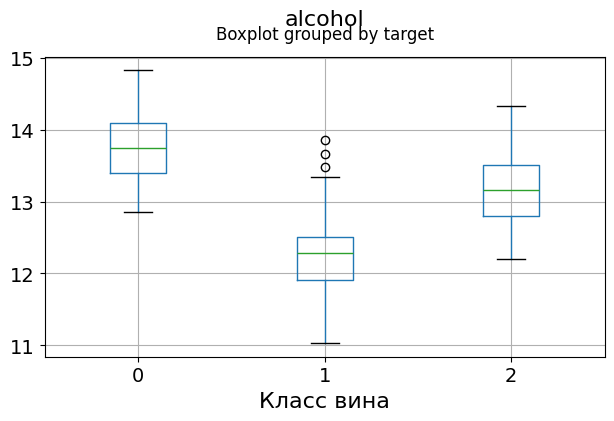

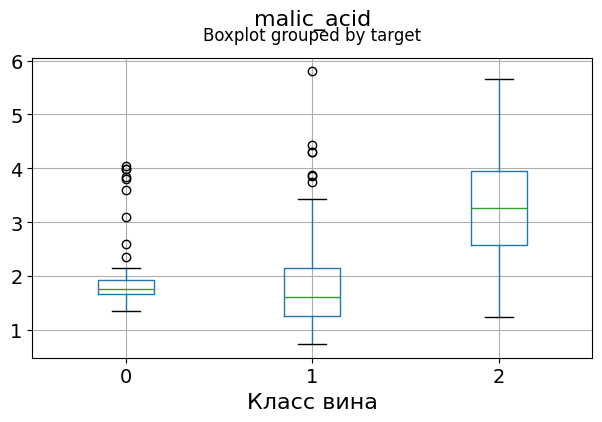

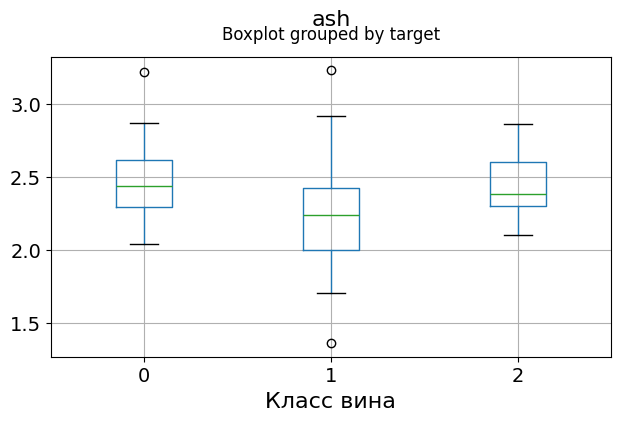

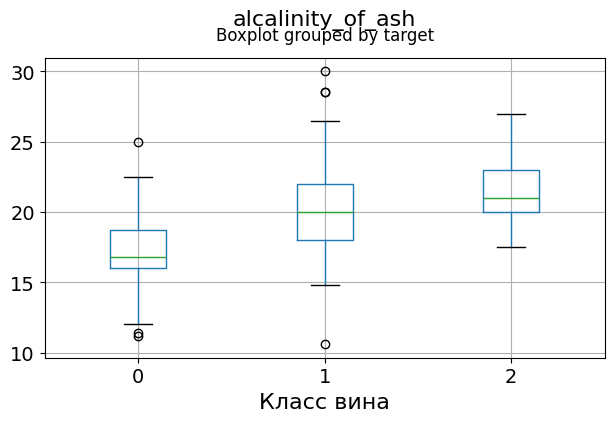

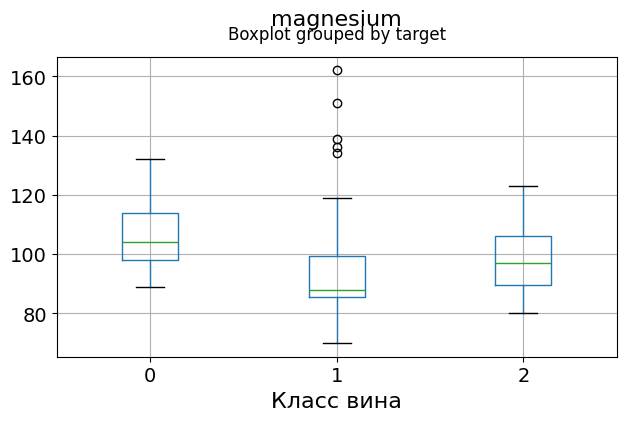

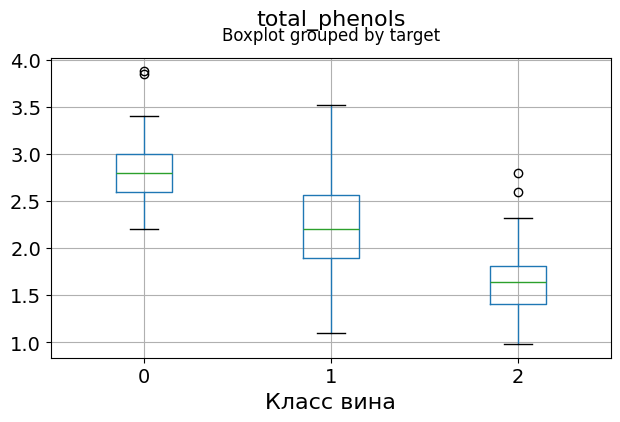

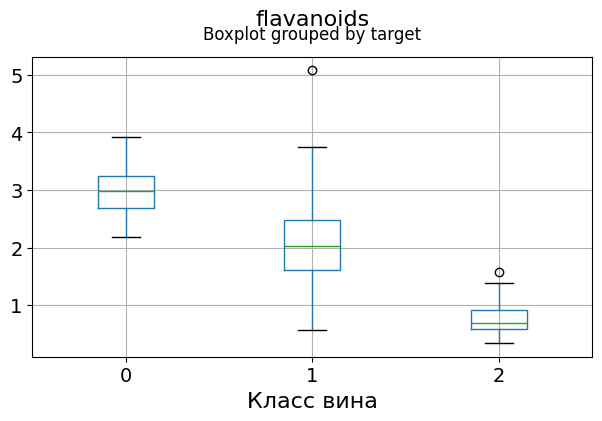

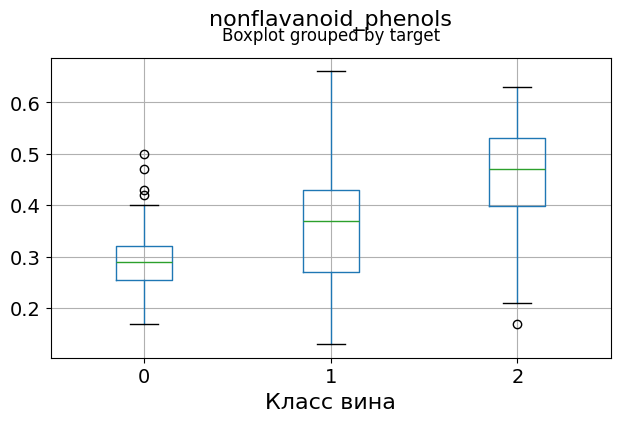

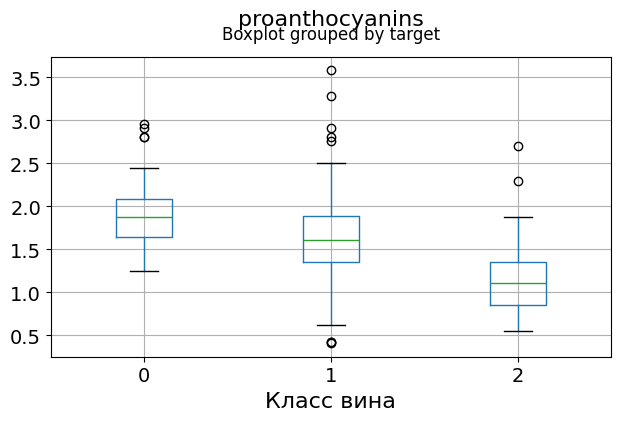

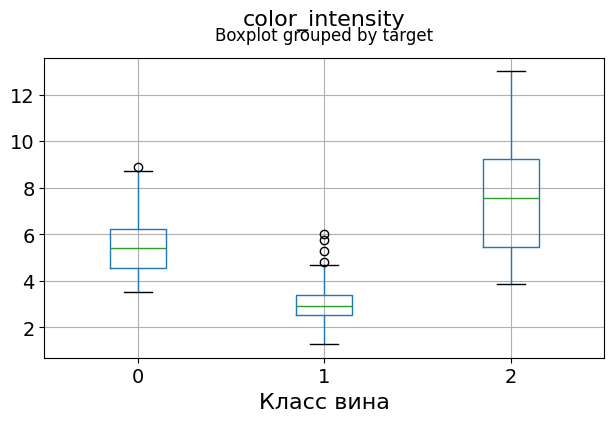

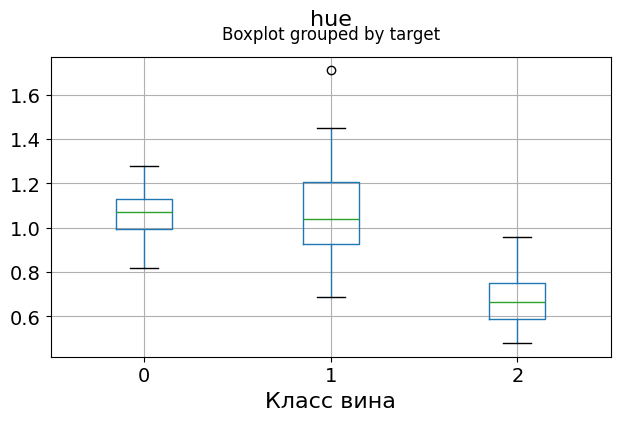

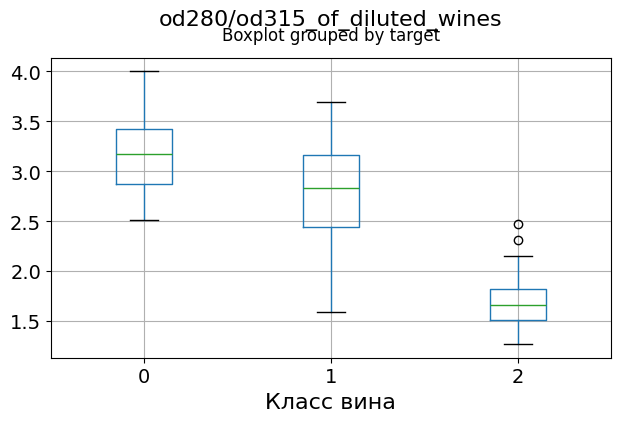

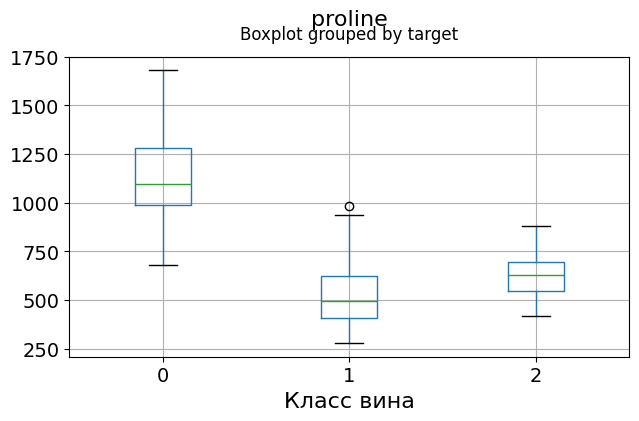

In [80]:
for c in df.columns[:-1]:
    df.boxplot(c,by='target',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Класс вина", fontsize=16)

Из диаграмм размаха следует, что некоторые признаки классифицируют классы вин достаточно хорошо. 
Например, показателям Alcalinity, Total Phenols или Flavonoids соответствуют диаграммы с хорошо отделимыми медианами, характеризующими классы вин.

Ниже визуализация разделения на классы по двум переменным:

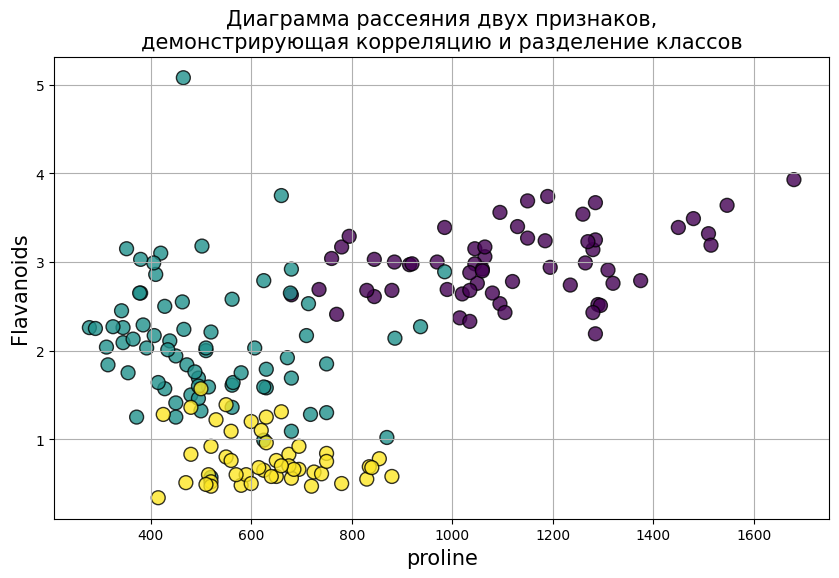

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(df['proline'],df['flavanoids'],c=df['target'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Диаграмма рассеяния двух признаков,\nдемонстрирующая корреляцию и разделение классов",fontsize=15)
plt.xlabel("proline",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15);

Для того, чтобы проверить уровень корреляции между признаками, визуализируем матрицу корреляций:

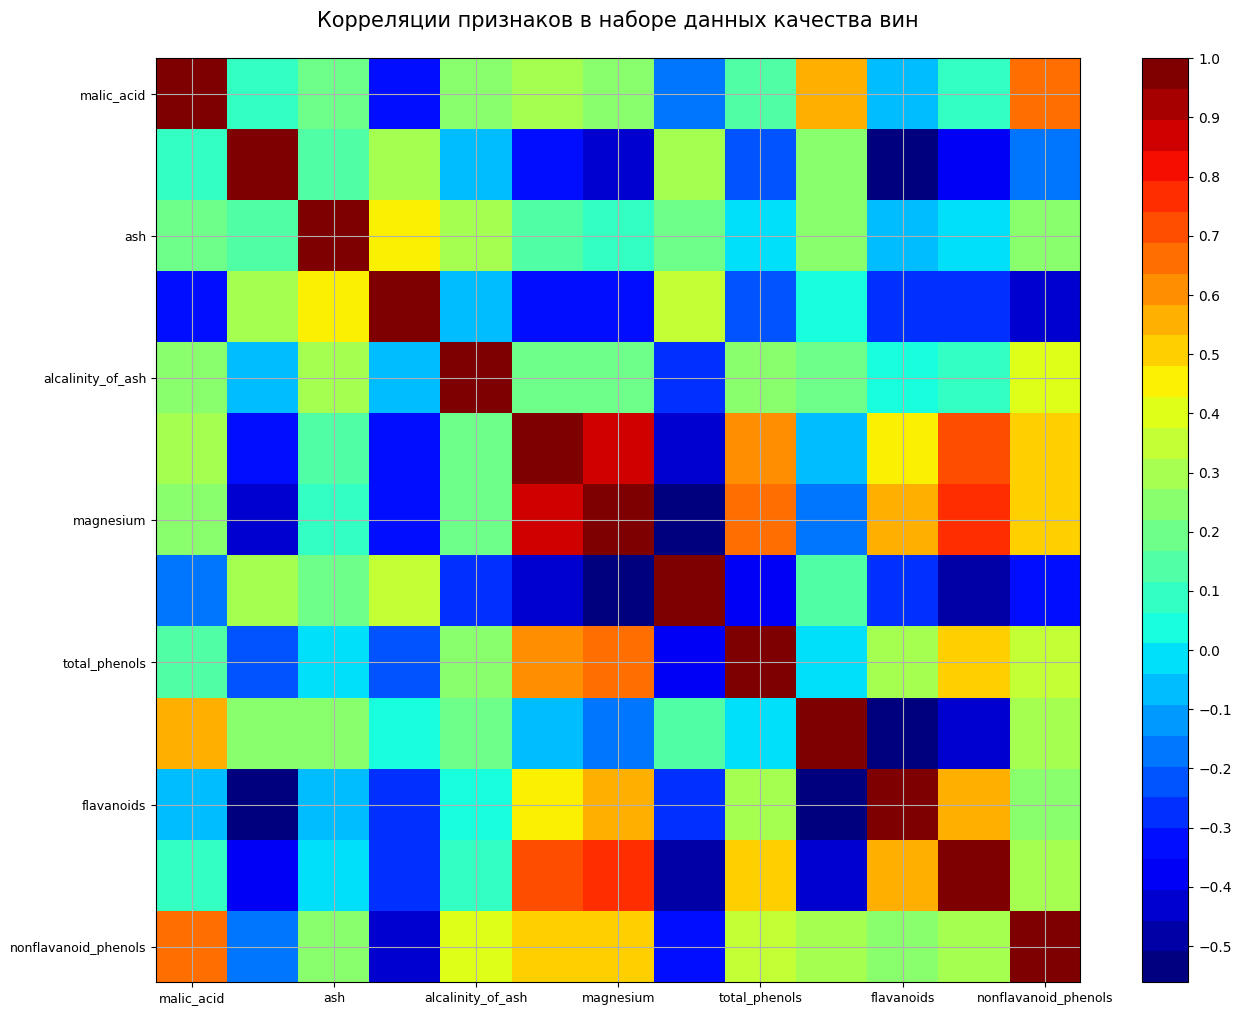

In [82]:
import warnings
warnings.filterwarnings("ignore")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Корреляции признаков в наборе данных качества вин\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df.drop('target',axis=1))

Разбиение на обучающую и тестовую выборки:

In [83]:
from sklearn.model_selection import train_test_split

test_size=0.3 # тестовая выборка 30%

In [84]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [85]:
X_train.shape

(124, 13)

In [86]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


### Классификация методом GaussianNB()

Пусть дана переменная класса $y$ и вектор признаков от $x_1$ до $x_n$, тогда теорема Байеса утверждает следующее:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Используя (наивное) допущение независимости, получаем
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
для всех $i$, поэтому 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Так как вероятность $P(x_1, \dots, x_n)$ не зависит от $y$, можно воспользоваться следующим правилом классификации:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

Здесь $P(y)$ – это относительная частота класса $y$ в обучающей выборке.

Распределение признаков принимается нормальным:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

Параметры $\sigma_y$ и $\mu_y$ определяются непосредственным расчетом.

In [87]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

Прогнозирование меток классов дает следующий результат (зависящий от разбиения на обучающее и тестовое множества):

In [88]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))

Количество неправильно классифицированных точек из 54 точек тестового множества равно 2


Можно воспользоваться следующим отчетом о классификации из sklearn:

In [89]:
# from sklearn.metrics import classification_report
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

Отчет о классификации:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        16

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



При помощи sklearn можно посчитать матрицу ошибок классификации:

In [90]:
import pandas as pd
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Класс 1','Класс 2',' Класс 3'], columns=['Класс 1','Класс 2',' Класс 3'])
print("Матрица ошибок:\n")
cmdf

Матрица ошибок:



,Класс 1,Класс 2,Класс 3
Класс 1,15,2,0
Класс 2,0,21,0
Класс 3,0,0,16


### Валидация модели

При валидации модели используем для оценки качества модели функцию `cross_val_score`. 

In [91]:
from sklearn.model_selection import cross_val_score

### Кросс-валидация по K блокам

При кросс-валидации по `k` блокам данные делятся на `k` частей. Модель обучается на `k-1` блоках, при этом один блок откладывается для тестирования. Этот процесс повторяется, чтобы каждый из блоков был использован как тестовый. После завершения процесса получаем  оценку, включающую среднее значение и/или стандартное отклонение.

In [92]:
# K-fold Cross-Validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

results_kfold = cross_val_score(nbc, X, y, cv=kfold)
print("Доля верных ответов (accuracy): %.2f%%" % (results_kfold.mean()*100.0)) 

Доля верных ответов (accuracy): 96.11%


In [93]:
results_kfold

array([1.   , 0.944, 0.889, 0.833, 0.944, 1.   , 1.   , 1.   , 1.   ,
       1.   ])

### Стратифицированная кросс-валидация по K блокам

Стратифицированный подход представляет собой разновидность кросс-валидации (перекрестной проверки), которая возвращает стратифицированные блоки, т. е. каждый блок содержит примерно такое же соотношение целевых меток, как и полные данные.

In [94]:
# Stratified K-fold Cross-Validation
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=10)

results_skfold = cross_val_score(nbc, X, y, cv=skfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_skfold.mean()*100.0, 
                                     results_skfold.std()*100.0))

Accuracy: 97.78% (2.72%)


### Кросс-валидация по отдельным объектам (Leave-One-Out)

LOOCV — это метод перекрестной валидации, в котором размер блока равен 1, а параметр `k` задается количеством записей в данных. Этот вариант полезен, когда обучающие данные имеют ограниченный размер.

In [95]:
# Leave One Out Cross-Validation 
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()

results_loocv = cross_val_score(nbc, X, y, scoring='recall', cv=loocv)
print("Полнота: %.2f%%" % (results_loocv.mean()*100.0))

Полнота: 38.76%


### Повторяющиеся случайные разбиения на обучающую и тестовую выборки

Метод представляет собой гибрид традиционного разделения на обучающую и тестовую выборки и перекрестной проверки k-fold. 

In [96]:
# Repeated Random Test-Train Splits
from sklearn.model_selection import ShuffleSplit

kfold_split = ShuffleSplit(n_splits=10, test_size=0.30)

results_split = cross_val_score(nbc, X, y, scoring='jaccard_macro', cv=kfold_split)
print("Коэффициент Жаккара: %.2f%% (%.2f%%)" % (results_split.mean()*100.0, 
                                                results_split.std()*100.0))

Коэффициент Жаккара: 94.45% (4.33%)


## Визуализация трехмерных данных

In [97]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

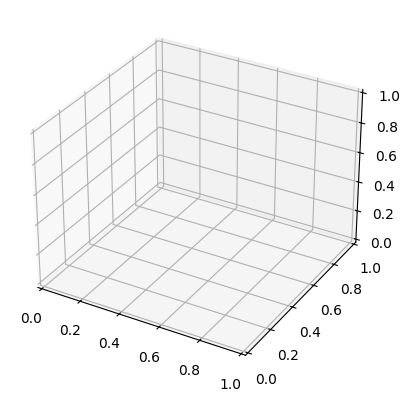

In [98]:
fig = plt.figure()
ax = plt.axes(projection='3d')

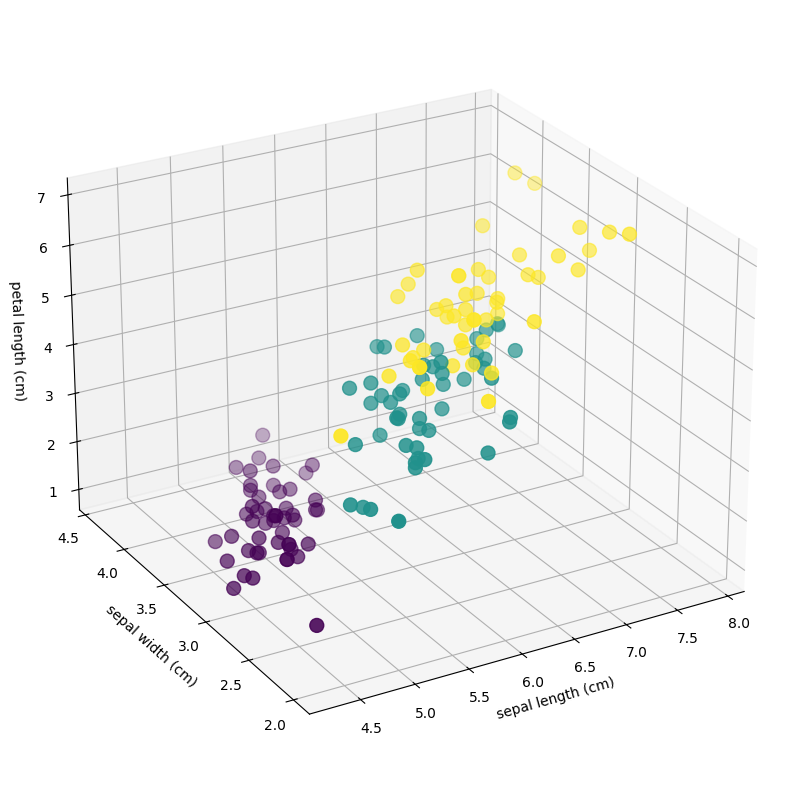

In [99]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
iris = datasets.load_iris()

xs = iris.data[:,0]
ys = iris.data[:,1]
zs = iris.data[:,2]
ax.scatter( xs, ys, zs, c=iris.target,s=100 )
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.view_init( azim=-120, elev=25 );

### Задание на лабораторную работу №4

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score). Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.

3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок. 

7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
* наивного байесовского классификатора  
* классификатора метода К ближайших соседей для значения К, определенного в п. 6.

9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 
